1. Importing Libraries



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
df = pd.read_csv('/content/India_crops_preprocessed.csv', index_col= False)

In [3]:
df.head()

,Unnamed: 0,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415.0,1.40
1,1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277.0,1.40
2,2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060.0,0.74
3,3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120.0,0.75


2. Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.
For instance, discard “ID,” “date,” and “index” variables.

In [4]:
df_sub = df.drop(columns = ['Unnamed: 0', 'Crop_Year','State','District ','Crop','Season'])

In [5]:
df_sub.head()

,Area,Production,Yield
0,2439.6,3415.0,1.40
1,1626.4,2277.0,1.40
2,4147.0,3060.0,0.74
3,4147.0,2660.0,0.64
4,4153.0,3120.0,0.75


3. Create a correlation matrix heatmap (colored).
Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

In [6]:
# Create a correlation matrix using pandas

df_sub.corr()

,Area,Production,Yield
Area,1.000000,0.048521,0.00013
Production,0.048521,1.000000,0.43740
Yield,0.000130,0.437400,1.00000


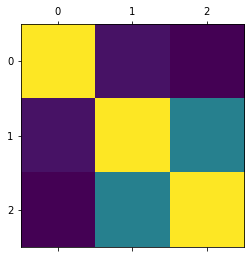

In [7]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_sub.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

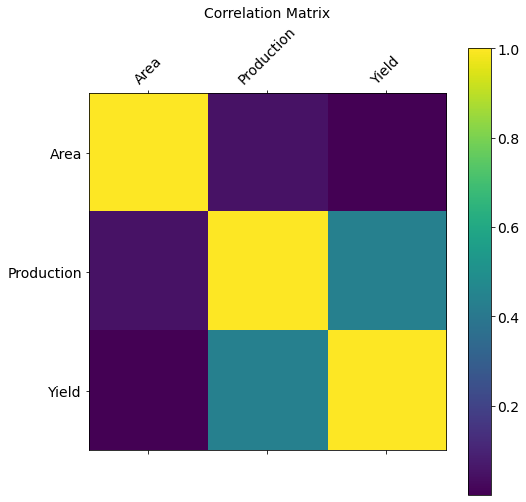

In [8]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

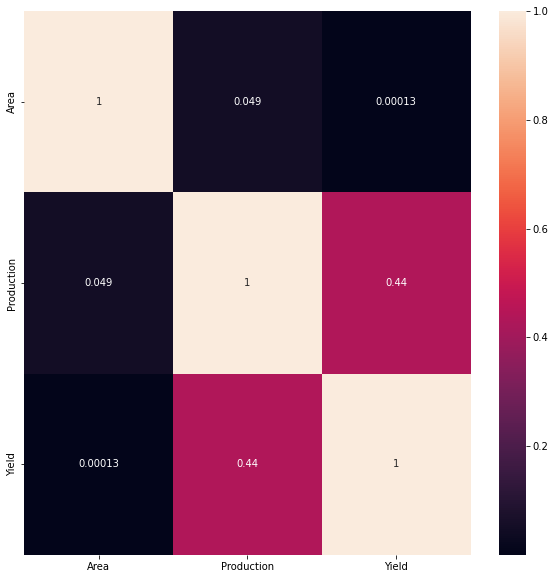

In [9]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

Interpretation: Moderate positive relationship between Production and Yield. Weak positive relationship between Area and Production, Area and Yield. 

4. Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.
Discuss the output in a markdown cell.

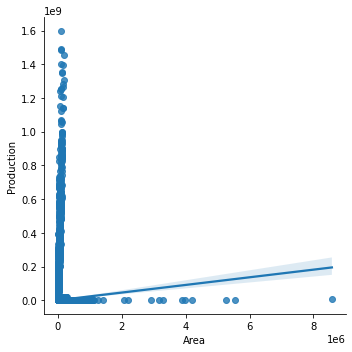

In [10]:
# Create a scatterplot for the "Area" and "Production" columns in seaborn

sns.lmplot(x = 'Area', y = 'Production', data = df_sub)

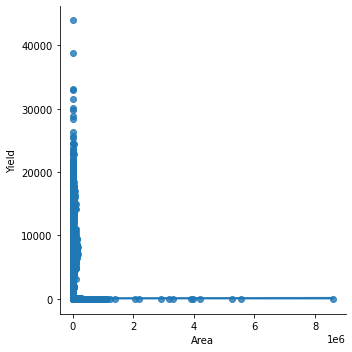

In [11]:
# Create a scatterplot for the "Area" and "Yield" columns in seaborn

sns.lmplot(x = 'Area', y = 'Yield', data = df_sub)

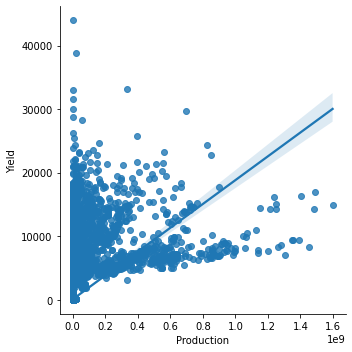

In [12]:
# Create a scatterplot for the "Production" and "Yield" columns in seaborn

sns.lmplot(x = 'Production', y = 'Yield', data = df_sub)

Interpretation: Only notable correlation between Production and Yield. 

5. Create a pair plot of the entire data set.
Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

In [ ]:
# Create a pair plot 

g = sns.pairplot(df_sub) #Couldn't be created due to machine limitations

6. Create a categorical plot and interpret the results.

<AxesSubplot:xlabel='Area', ylabel='Count'>

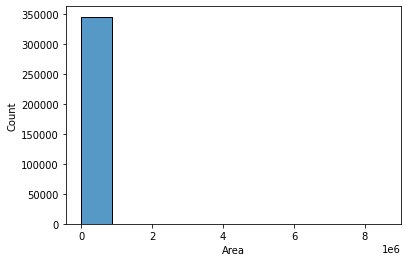

In [13]:
sns.histplot(df_sub['Area'],  bins = 10)

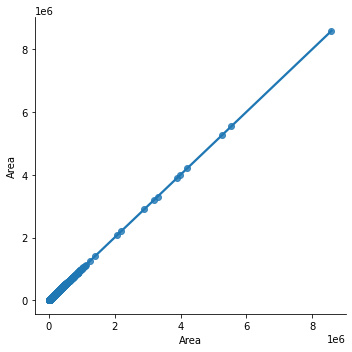

In [14]:
sns.lmplot(x = 'Area', y = 'Area', data = df_sub)

Interpretation: Areas greater than 200000 hectares are outliers. 

In [15]:
#creating categories

df.loc[df['Area'] < 500, 'Area_Category'] = 'Small Land'

In [16]:
df.loc[(df['Area'] >= 500) & (df['Area'] < 10000), 'Area_Category'] = 'Mid-sized Land'

In [17]:
df.loc[(df['Area'] >= 10000) & (df['Area'] < 200000), 'Area_Category'] = 'Large Land'

In [18]:
df.loc[df['Area'] >= 200000, 'Area_Category'] = 'Very Large Land'

In [19]:
df

,Unnamed: 0,State,District,Crop,Crop_Year,Season,Area,Production,Yield,Area_Category
0,0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415.0,1.40,Mid-sized Land
1,1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277.0,1.40,Mid-sized Land
2,2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060.0,0.74,Mid-sized Land
3,3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660.0,0.64,Mid-sized Land
4,4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120.0,0.75,Mid-sized Land
...,...,...,...,...,...,...,...,...,...,...
345331,345331,West Bengal,PURULIA,Wheat,2015,Rabi,855.0,1241.0,1.45,Mid-sized Land
345332,345332,West Bengal,PURULIA,Wheat,2016,Rabi,1366.0,2415.0,1.77,Mid-sized Land
345333,345333,West Bengal,PURULIA,Wheat,2017,Rabi,1052.0,2145.0,2.04,Mid-sized Land
345334,345334,West Bengal,PURULIA,Wheat,2018,Rabi,833.0,2114.0,2.54,Mid-sized Land


In [20]:
df['Area_Category'].value_counts(dropna=False)

Small Land         169172
Mid-sized Land     118000
Large Land          55155
Very Large Land      3009
Name: Area_Category, dtype: int64

In [ ]:
# Create a categorical plot in seaborn using the area categories created above

sns.set(style="ticks")
g = sns.catplot(x="Production", y="Area", hue="Area_Category", data=df) #couldn't be accomplished due to machine limitations

7. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

**New Questions:** 

1.   Where are the very large lands located? 
2.   Why might the large and very large lands have such significantly less productions than the small and medium lands? 



8. Define any hypotheses that you can at this point. You’ll be testing these later on.

**Hypotheses:** 

1.   Production is commensurate with land size (when land size is between small to large). 
2.   Larger areas generate greater yields (when land size is smaller than 200000 acres). 



**Bonus Task:** 

We can see that lands larger or equal to 200000 are outliers from the histogram. Also lands bigger than 150000 hectares don't produce a great amount of crops compared to smaller lands. From this consideration, I am going to create two sub datasets: one containing records of small to large lands, other containing records of very large lands. 

I will create pairplots and scatterplots from this sub datasets, since creating these plots from the big dataset couldn't be accomplished due to machine limitations. 





Creating a separate dataframe for small to large lands

In [22]:
df_regular_lands = df[df['Area'] < 200000]

In [23]:
df_regular_lands['Area_Category'].value_counts(dropna = False)

Small Land        169172
Mid-sized Land    118000
Large Land         55155
Name: Area_Category, dtype: int64

In [25]:
df_regular_lands.shape

(342327, 10)

In [27]:
df_regular_lands_sub = df_regular_lands.drop(columns = ['Unnamed: 0', 'Crop_Year','State','District ','Crop','Season','Area_Category'])

In [28]:
df_regular_lands_sub.head()

,Area,Production,Yield
0,2439.6,3415.0,1.40
1,1626.4,2277.0,1.40
2,4147.0,3060.0,0.74
3,4147.0,2660.0,0.64
4,4153.0,3120.0,0.75


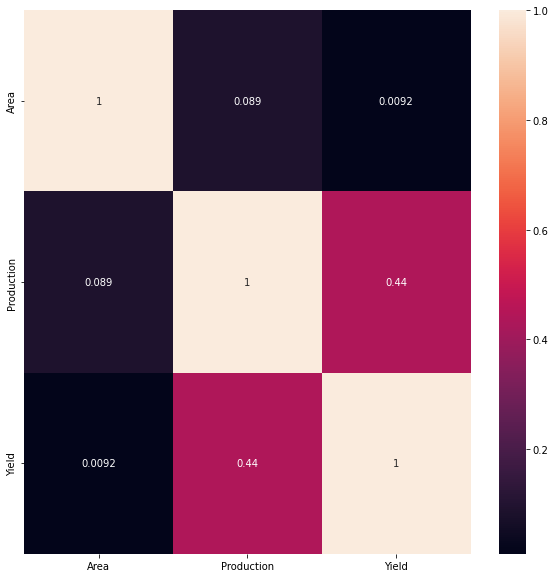

In [30]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_regular_lands_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

Interpretation: Moderate positive relationship between Production and Yield. Weak positive relationship between Area and Production, Area and Yield. 

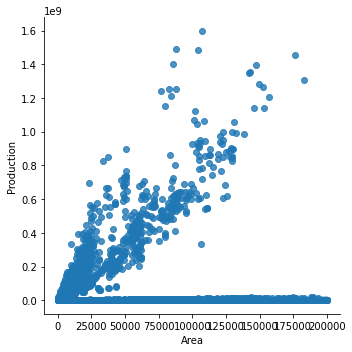

In [32]:
# Create a scatterplot for the "Area" and "Production" columns in seaborn

sns.lmplot(x = 'Area', y = 'Production', data = df_regular_lands_sub)

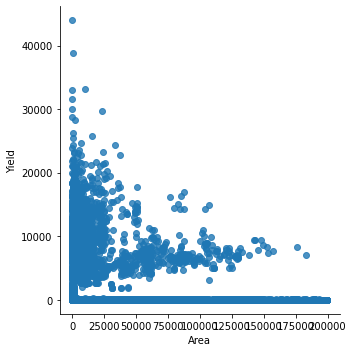

In [33]:
# Create a scatterplot for the "Area" and "Yield" columns in seaborn

sns.lmplot(x = 'Area', y = 'Yield', data = df_regular_lands_sub)

In [ ]:
# Create a pair plot 

g = sns.pairplot(df_regular_lands_sub) #Couldn't accomplish due to machine limitations

<AxesSubplot:xlabel='Area', ylabel='Count'>

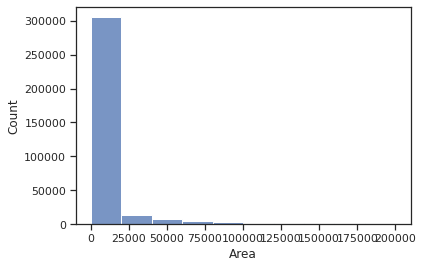

In [48]:
# Creating histograms in lieu of pairplots. Scatterplots are created avobe.

sns.histplot(df_regular_lands_sub['Area'],  bins = 10)

<AxesSubplot:xlabel='Production', ylabel='Count'>

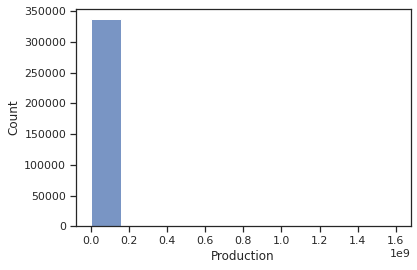

In [49]:
# Creating histograms in lieu of pairplots. Scatterplots are created avobe.

sns.histplot(df_regular_lands_sub['Production'],  bins = 10)

<AxesSubplot:xlabel='Yield', ylabel='Count'>

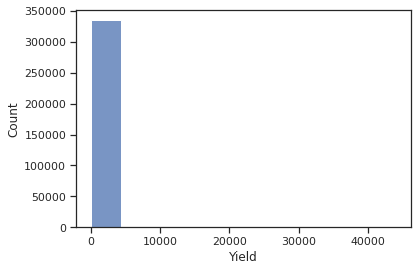

In [50]:
# Creating histograms in lieu of pairplots. Scatterplots are created avobe.

sns.histplot(df_regular_lands_sub['Yield'],  bins = 10)

In [44]:
# Create a categorical plot in seaborn using the area categories created above

sns.set(style="ticks")
g = sns.catplot(x="Production", y="Area", hue="Area_Category", data= df_regular_lands_sub) #Error showing

ValueError: ignored

Creating a separate dataframe for very large lands.

In [34]:
df_outlier_lands = df[df['Area'] >= 200000]

In [35]:
df_outlier_lands['Area_Category'].value_counts(dropna = False)

Very Large Land    3009
Name: Area_Category, dtype: int64

In [36]:
df_outlier_lands.shape

(3009, 10)

In [37]:
df_outlier_lands_sub = df_outlier_lands.drop(columns = ['Unnamed: 0', 'Crop_Year','State','District ','Crop','Season','Area_Category'])

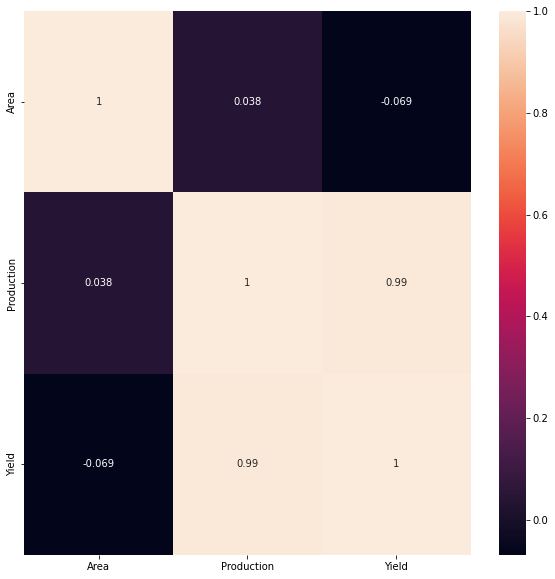

In [38]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_outlier_lands_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

Interpretation: Weak positive relationship between Production and Yield, Area and Production. Weak negative relationship between Area and Yield. 

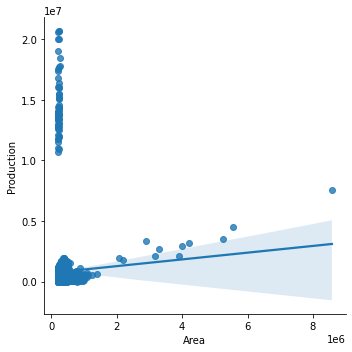

In [39]:
# Create a scatterplot for the "Area" and "Production" columns in seaborn

sns.lmplot(x = 'Area', y = 'Production', data = df_outlier_lands_sub)

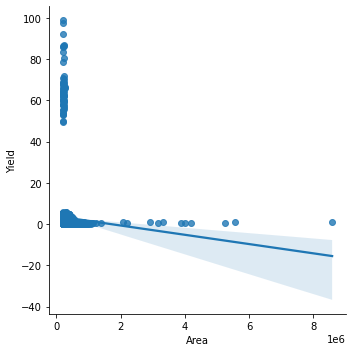

In [40]:
# Create a scatterplot for the "Area" and "Yield" columns in seaborn

sns.lmplot(x = 'Area', y = 'Yield', data = df_outlier_lands_sub)

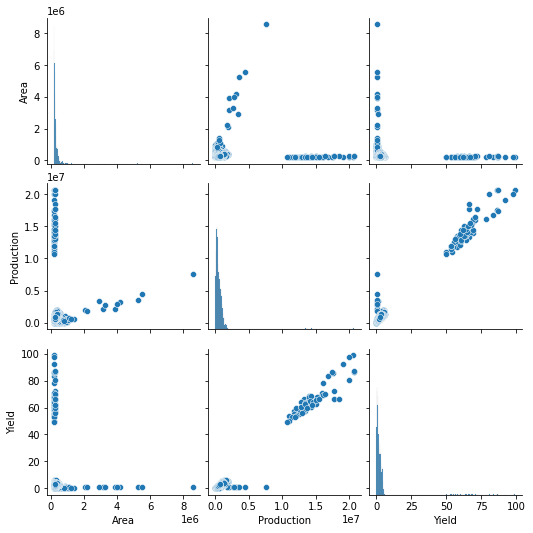

In [41]:
# Create a pair plot 

g = sns.pairplot(df_outlier_lands_sub)

In [51]:
#Downloading the subd datasets

from google.colab import files
df_outlier_lands_sub.to_csv('Outlier_lands_sub.csv') 
files.download('Outlier_lands_sub.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [52]:
#Downloading the subd datasets

from google.colab import files
df_regular_lands_sub.to_csv('Regular_lands_sub.csv') 
files.download('Regular_lands_sub.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>